# Quadratic Regression
Assume that we are given the following six data points:

```python
x = 0, 4, 8, 12, 16, 20
y = 67.38, 74.67, 82, 91.69, 101.6, 112.58
```

And we would like to find a parabola (a function of the form $y = a + bx + cx^2$) that best fits to these data points. Our design matrix in this case is:

$$X = \begin{pmatrix}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
1 & x_3 & x_3^2 \\
1 & x_4 & x_4^2 \\
1 & x_5 & x_5^2 \\
1 & x_6 & x_6^2
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 & 0 \\
1 & 4 & 16 \\
1 & 8 & 64 \\
1 & 12 & 144 \\
1 & 16 & 256 \\
1 & 20 & 400
\end{pmatrix}
$$

And the target vector is:

$$y = \begin{pmatrix}
67.38 \\
74.67 \\
82 \\
91.69 \\
101.6 \\
112.58
\end{pmatrix}
$$

We can now use the closed-form solution to find the parameters of the parabola:

$$w^* = (X^tX)^{-1} X^ty$$

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.array([0, 4, 8, 12, 16, 20])
y = np.array([67.38, 74.67, 82, 91.69, 101.6, 112.58])

In [4]:
X = np.column_stack((np.ones(len(x)), x, x**2))

In [5]:
X

array([[  1.,   0.,   0.],
       [  1.,   4.,  16.],
       [  1.,   8.,  64.],
       [  1.,  12., 144.],
       [  1.,  16., 256.],
       [  1.,  20., 400.]])

In [6]:
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([6.74267857e+01, 1.61838393e+00, 3.21093750e-02])

Therefore, the best-fit parabola is:

$$y = 67.4268 + 1.6184x + 0.0321x^2$$

Text(0, 0.5, '$y$')

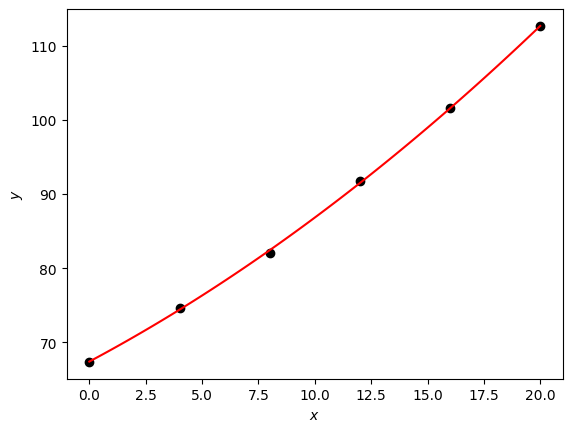

In [8]:
plt.scatter(x, y, c='k')

x_test = np.linspace(0, 20, 100)
y_test = w[0] + w[1] * x_test + w[2] * x_test**2
plt.plot(x_test, y_test, c='r')

plt.xlabel('$x$')
plt.ylabel('$y$')

## Feature Crosses
What happens if we have more than one feature in the data set? In this case, we can include in our model not only the powers of each feature, but also the interactions between them.

A **feature cross** is a feature created by multiplying (crossing) two or more input features together. For example, $x_1 x_2$ is a feature formed by multiplying the values of the features $x_1$ and $x_2$. Feature crosses can give our model better predictive abilities than just using the input features individually.

In a polynomial regression of degree $d$, we typically include the powers of all the input features up to degree $d$ and all the their possible combinations.

### The PolynomialFeatures Class
Scikit-learn provides the transformer `PolynomialFeatures` that creates a new design matrix consisting of all the polynomial combinations of the features up to a specified degree.

## Polynomial Regression Example in Scikit-Learn
In the following example we will fit a polynomial function to an artificially created data set.

The data set will consist of 50 points sampled from the function $f(x) = sin(x)$ in the interval $[0, 10]$ with some random noise. The noise will be normally distributed with a mean of $0$ and standard deviation of $0.3$.

In [27]:
def make_data(n=50, noise=0.3):
    x = np.random.rand(n) * 10
    err = np.random.normal(size=n) * noise
    y = np.sin(x) + err
    return x, y

Text(0, 0.5, '$y$')

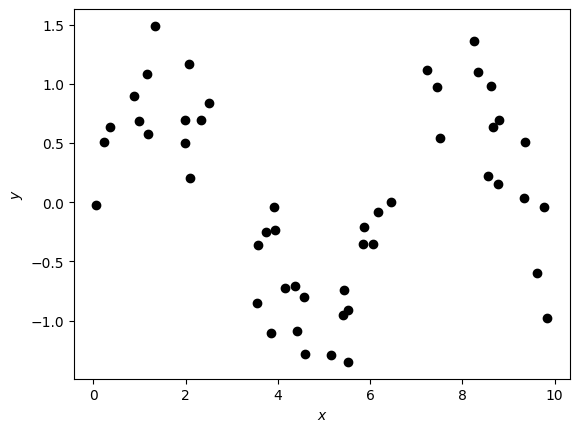

In [28]:
x_train, y_train = make_data()

plt.scatter(x_train, y_train, color='k')
plt.xlabel('$x$')
plt.ylabel('$y$')

In [29]:
X_train = x_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

In [30]:
x_test, y_test = make_data(n=25)
X_test = x_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree=2):
    return Pipeline([('poly', PolynomialFeatures(degree)),
                     ('reg', LinearRegression())])

In [32]:
model = PolynomialRegression(5)
model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ('reg', LinearRegression())])

In [33]:
train_score = model.score(X_train, y_train)
print(f'R2 score (train): {train_score:.5f}')

test_score = model.score(X_test, y_test)
print(f'R2 score (test): {test_score:.5f}')

R2 score (train): 0.80031
R2 score (test): 0.66222


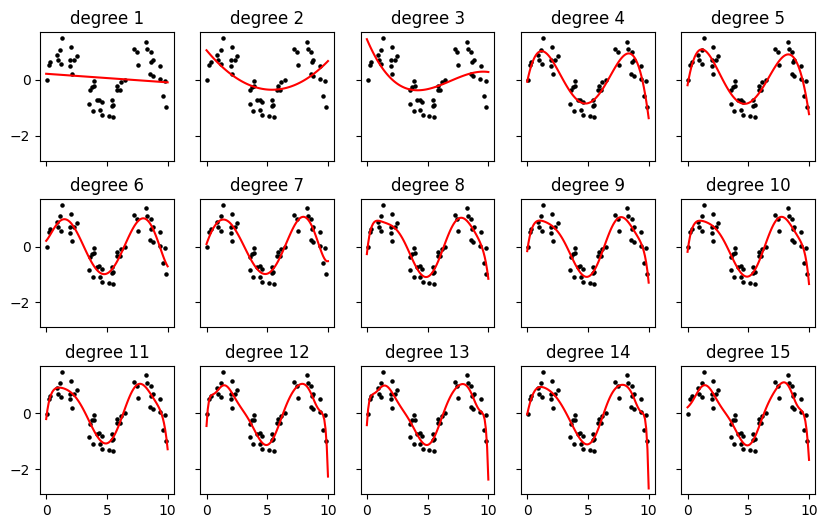

In [34]:
fig, axes = plt.subplots(3, 5, figsize=(10, 6), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.3)
X = np.linspace(0, 10, 100).reshape(-1, 1)

for ax, degree in zip(axes.flat, range(1, 16)):
    ax.scatter(X_train, y_train, color='k', s=5)
    
    reg = PolynomialRegression(degree)
    reg.fit(X_train, y_train)
    
    y = reg.predict(X)    
    ax.plot(X, y, color='r')
    ax.set_title(f'degree {degree}')

We can clearly see that polynomials with low degrees are underfitting the data, while polynomial with high degrees are overfitting. The polynomials in the middle range (with degrees 5–7) capture properly the general shape of the sine function, and thus are likely to have better performance on the test set.

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'poly__degree': np.arange(1, 21),
}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'poly__degree': 4}
